In [26]:
#439 final abortion project

In [ ]:
#cleaning and encoding

In [2]:
#imports
import pandas as pd
import numpy as np

In [6]:
#read
df = pd.read_csv('synthetic_abortion_data.csv')#synthesized data file
df.head()

,Patient_ID,Gestation_at_Abortion_Weeks,Method_of_Abortion,Travel_Out_of_State,Abortion_Success,Medical_Complications_to_Mother,Medical_Complications_to_Child,Age_of_Mother,Relationship_Status,Race,Economic_Status,Insurance,Year,State,Political_Affiliation_of_State,Legal_Status_of_Abortion,State_Regulations
0,1,11.5,Surgical,False,True,NaN,NaN,22,Widowed,Asian,High Income,Other,2021,Alaska,Republican,Legal,Low
1,2,9.6,Surgical,True,True,NaN,NaN,23,Widowed,Asian,Low Income,Private Insurance,2024,Nebraska,Republican,Restricted,High
2,3,8.4,Other,False,True,NaN,NaN,14,Widowed,Non-Hispanic White,Middle Income,Military Insurance,2015,Missouri,Republican,Banned,High
3,4,9.6,Medical,True,True,NaN,NaN,18,Divorced,Pacific Islander,Low Income,Military Insurance,2021,Wyoming,Republican,Legal,Moderate
4,5,8.7,Medical,False,True,NaN,NaN,45,Cohabitating,Pacific Islander,On government assistance,Military Insurance,2018,South Carolina,Republican,Legal,Moderate


In [7]:
# Replace 'None' with 'No' in the complication columns
# Replace Python None and np.nan with 'No'
#two methods to ensure no Nans
df[['Medical_Complications_to_Mother', 'Medical_Complications_to_Child']] = (
    df[['Medical_Complications_to_Mother', 'Medical_Complications_to_Child']].fillna("No")
)
df['Medical_Complications_to_Mother'] = df['Medical_Complications_to_Mother'].replace("None", "No")
df['Medical_Complications_to_Child'] = df['Medical_Complications_to_Child'].replace("None", "No")
df.head()

,Patient_ID,Gestation_at_Abortion_Weeks,Method_of_Abortion,Travel_Out_of_State,Abortion_Success,Medical_Complications_to_Mother,Medical_Complications_to_Child,Age_of_Mother,Relationship_Status,Race,Economic_Status,Insurance,Year,State,Political_Affiliation_of_State,Legal_Status_of_Abortion,State_Regulations
0,1,11.5,Surgical,False,True,No,No,22,Widowed,Asian,High Income,Other,2021,Alaska,Republican,Legal,Low
1,2,9.6,Surgical,True,True,No,No,23,Widowed,Asian,Low Income,Private Insurance,2024,Nebraska,Republican,Restricted,High
2,3,8.4,Other,False,True,No,No,14,Widowed,Non-Hispanic White,Middle Income,Military Insurance,2015,Missouri,Republican,Banned,High
3,4,9.6,Medical,True,True,No,No,18,Divorced,Pacific Islander,Low Income,Military Insurance,2021,Wyoming,Republican,Legal,Moderate
4,5,8.7,Medical,False,True,No,No,45,Cohabitating,Pacific Islander,On government assistance,Military Insurance,2018,South Carolina,Republican,Legal,Moderate


In [8]:
#encoding 
df_encoded = pd.get_dummies(df, columns=['Relationship_Status', 'Race', 'Economic_Status', 'Insurance', 'State', 'Political_Affiliation_of_State', 'Legal_Status_of_Abortion', 'State_Regulations', 'Method_of_Abortion', 'Travel_Out_of_State', 'Abortion_Success', 'Medical_Complications_to_Mother', 'Medical_Complications_to_Child'], drop_first=False)
df_encoded.to_csv('encoded_abortion_data.csv', index=False)

In [ ]:
#EDA Graphs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Group by year and compute average complication rate
bins = [0, 19, 24, 29, 34, 39, 49, 100]
labels = ['≤19', '20–24', '25–29', '30–34', '35–39', '40–49', '50+']
df_encoded['Age_Group'] = pd.cut(df_encoded['Age_of_Mother'], bins=bins, labels=labels, right=True)
complication_by_age = df_encoded.groupby(['Year', 'Age_Group'], observed=False)['Complication'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.lineplot(data=complication_by_age, x='Year', y='Complication', hue='Age_Group', marker='o')
plt.axvline(x=2022, linestyle='--', color='red', label='Roe v. Wade Overturned')
plt.title('Average Complication Rate Per Year by Age Group', fontsize=15)
plt.xlabel('Year', fontsize=13)
plt.ylabel('Average Complication Rate', fontsize=13)
plt.legend(title='Age Group')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

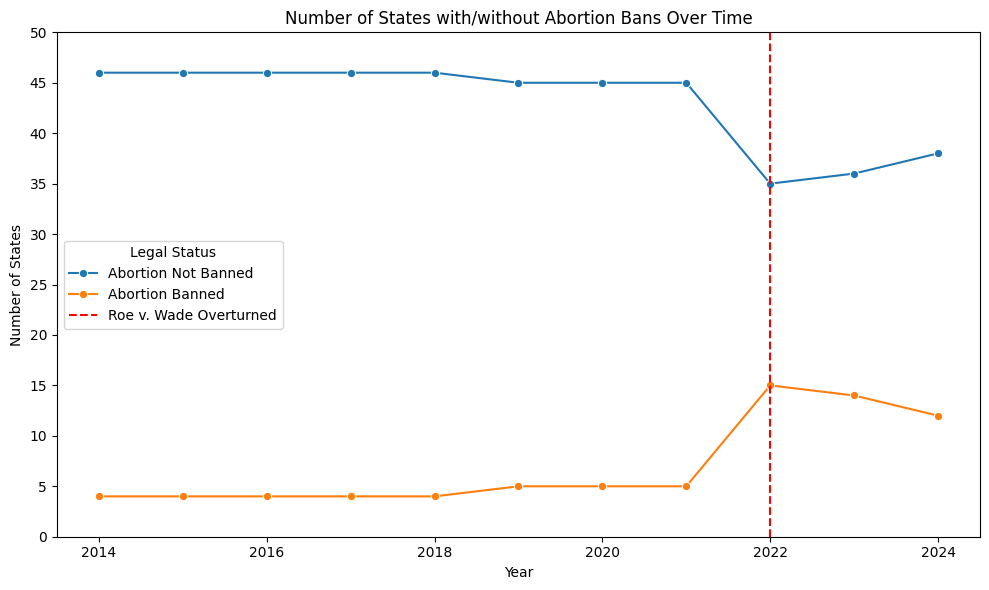

In [24]:
state_counts = (
    df_encoded.groupby(['Year', 'Treatment'])['State'].nunique().reset_index(name='Num_States')
)
state_counts['Treatment_Label'] = state_counts['Treatment'].map({
    True: 'Abortion Banned',
    False: 'Abortion Not Banned'
})

# Plot with clearer labels
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='Year',
    y='Num_States',
    hue='Treatment_Label',
    data=state_counts,
    marker='o'
)
plt.axvline(x=2022, linestyle='--', color='red', label='Roe v. Wade Overturned')
plt.title('Number of States with/without Abortion Bans Over Time')
plt.xlabel('Year')
plt.ylabel('Number of States')
plt.yticks(range(0, state_counts['Num_States'].max() + 5, 5))
plt.legend(title='Legal Status')
plt.tight_layout()
plt.show()

In [ ]:
df = pd.read_csv('synthetic_abortion_data.csv')

# Filter data for each legal status
df_legal = df[df['Legal_Status_of_Abortion'] == 'Legal']
df_restricted = df[df['Legal_Status_of_Abortion'] == 'Restricted']
df_banned = df[df['Legal_Status_of_Abortion'] == 'Banned']

# Helper function to plot medical complications
def plot_medical_complications(df, legal_status, title):
    # Group by State Regulations and count occurrences of complications
    df_grouped = df.groupby(['State_Regulations', 'Medical_Complications_to_Mother', 'Medical_Complications_to_Child']).size().reset_index(name='Count')

    # Filter data for state regulation categories (High, Moderate, Low)
    df_grouped = df_grouped[df_grouped['State_Regulations'].isin(['High', 'Moderate', 'Low'])]

    # Plot a stacked bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='State_Regulations', y='Count', hue='Medical_Complications_to_Mother', data=df_grouped, palette='Set2', ci=None)
    plt.title(f'{title} - Medical Complications to Mother')
    plt.xlabel('State Regulations')
    plt.ylabel('Number of Cases')
    plt.legend(title='Complications to Mother', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='State_Regulations', y='Count', hue='Medical_Complications_to_Child', data=df_grouped, palette='Set2', ci=None)
    plt.title(f'{title} - Medical Complications to Child')
    plt.xlabel('State Regulations')
    plt.ylabel('Number of Cases')
    plt.legend(title='Complications to Child', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

# Plot graphs for Legal status
plot_medical_complications(df_legal, 'Legal', 'Medical Complications for Legal Status')

# Plot graphs for Restricted status
plot_medical_complications(df_restricted, 'Restricted', 'Medical Complications for Restricted Status')

# Plot a pie chart for Banned status, based on "Travel Out of State"
df_banned_grouped = df_banned.groupby(['Travel_Out_of_State', 'Medical_Complications_to_Mother', 'Medical_Complications_to_Child']).size().reset_index(name='Count')

# Pie chart for Travel Out of State when Legal Status is Banned
plt.figure(figsize=(8, 8))
df_banned_grouped_travel = df_banned_grouped.groupby('Travel_Out_of_State').size()
colors = ['#cdb4db', '#b5ead7']  # pastel purple and pastel green
df_banned_grouped_travel.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    labels=["No", "Yes"],
    colors=colors
)
plt.title('Travel Out of State When Abortion is Banned')
plt.ylabel('')  # Remove the y-label to make the pie chart cleaner
plt.show()

In [ ]:
#pca model

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

df = pd.read_csv('synthetic_abortion_data.csv')
df.head()

,Patient_ID,Gestation_at_Abortion_Weeks,Method_of_Abortion,Travel_Out_of_State,Abortion_Success,Medical_Complications_to_Mother,Medical_Complications_to_Child,Age_of_Mother,Relationship_Status,Race,Economic_Status,Insurance,Year,State,Political_Affiliation_of_State,Legal_Status_of_Abortion,State_Regulations
0,1,11.5,Surgical,False,True,NaN,NaN,22,Widowed,Asian,High Income,Other,2021,Alaska,Republican,Legal,Low
1,2,9.6,Surgical,True,True,NaN,NaN,23,Widowed,Asian,Low Income,Private Insurance,2024,Nebraska,Republican,Restricted,High
2,3,8.4,Other,False,True,NaN,NaN,14,Widowed,Non-Hispanic White,Middle Income,Military Insurance,2015,Missouri,Republican,Banned,High
3,4,9.6,Medical,True,True,NaN,NaN,18,Divorced,Pacific Islander,Low Income,Military Insurance,2021,Wyoming,Republican,Legal,Moderate
4,5,8.7,Medical,False,True,NaN,NaN,45,Cohabitating,Pacific Islander,On government assistance,Military Insurance,2018,South Carolina,Republican,Legal,Moderate


In [10]:
access_cols = [col for col in df_encoded.columns if any(keyword in col for keyword in ['Legal_Status_of_Abortion', 'State_Regulations'])]
df_access = df_encoded[access_cols]

df_access['State'] = df['State']  # Add back unencoded State column
df_state_avg = df_access.groupby('State').mean()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_state_avg)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['State'] = df_state_avg.index
pca_df = pca_df.sort_values(by='State').reset_index(drop=True)
pca_df['State_group'] = (pca_df.index // 10) + 1


/tmp/ipykernel_78727/1270437587.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_access['State'] = df['State']  # Add back unencoded State column


In [11]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=df_state_avg.columns
)

# Sort features by absolute contribution to PC1 and PC2
top_pc1 = loadings['PC1'].abs().sort_values(ascending=False).head(3)
top_pc2 = loadings['PC2'].abs().sort_values(ascending=False).head(3)

# Print top contributing features
print("Top PC1 features:")
print(top_pc1)

print("\nTop PC2 features:")
print(top_pc2)

Top PC1 features:
Legal_Status_of_Abortion_Legal     0.540602
State_Regulations_High             0.522721
Legal_Status_of_Abortion_Banned    0.470722
Name: PC1, dtype: float64

Top PC2 features:
State_Regulations_Moderate             0.702795
State_Regulations_Low                  0.515194
Legal_Status_of_Abortion_Restricted    0.406289
Name: PC2, dtype: float64


In [ ]:
#each set of 10 states is a diff shape and color
shape_map = {1: 'o', 2: 's', 3: 'X', 4: 'P', 5: 'D'}  # dot, square, X, plus-filled, diamond
group_labels = {1: 'Group 1', 2: 'Group 2', 3: 'Group 3', 4: 'Group 4', 5: 'Group 5'}

# 10 diff colors to make them more noticeable
palette = sns.color_palette("tab20", n_colors=50)


# Plot 
plt.figure(figsize=(10, 10))
custom_legends = []

for group in range(1, 6):
    subset = pca_df[pca_df['State_group'] == group]
    marker = shape_map[group]
    colors = palette[(group-1)*10 : group*10]  # 10 unique colors per group

    for idx, (i, row) in enumerate(subset.iterrows()):
        color = colors[idx % 10]
        plt.scatter(row['PC1'], row['PC2'], color=color, marker=marker, s=100)
        state_name = row['State']
        custom_legends.append(Line2D(
            [0], [0], 
            marker=marker, color='w', label=f"{group_labels[group]}: {state_name}",
            markerfacecolor=color, markersize=10
        ))
#legend to help show which state is which
from collections import defaultdict
grouped = defaultdict(list)
for handle in custom_legends:
    group_name, state_label = handle.get_label().split(": ", 1)
    grouped[group_name].append(Line2D([0], [0], marker=handle.get_marker(), color='w',
                                      markerfacecolor=handle.get_markerfacecolor(),
                                      label=state_label, markersize=10))

legend_handles = []
for group_name, states in grouped.items():
    legend_handles.append(mpatches.Patch(color='none', label=group_name))  # Group header
    legend_handles.extend(states)

plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='upper left', title='Legend')
plt.title('PCA of Abortion Access Features by State')
plt.xlabel('Principal Component 1: Legal Status of Abortion')
plt.ylabel('Principal Component 2: Regulation Status of Abortion Per State')
plt.show()

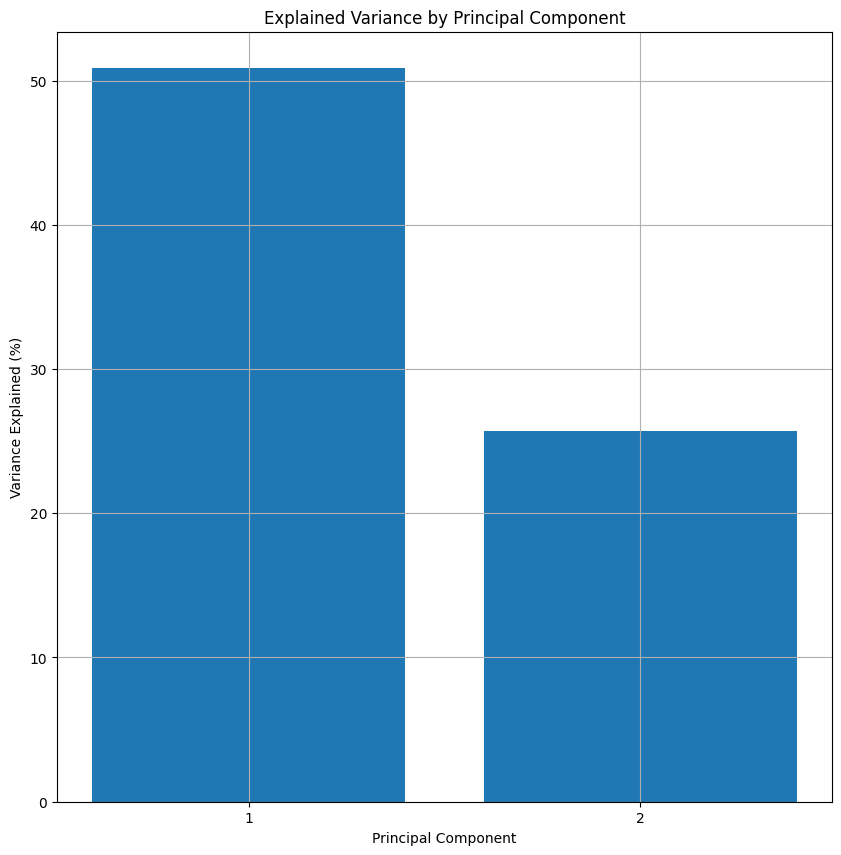

In [13]:
explained_var = pca.explained_variance_ratio_
components = np.arange(1, len(explained_var) + 1)

plt.figure(figsize=(10, 10))
plt.bar(components, explained_var * 100)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained (%)')
plt.title('Explained Variance by Principal Component')
plt.xticks(components)
plt.grid(True)
plt.show()

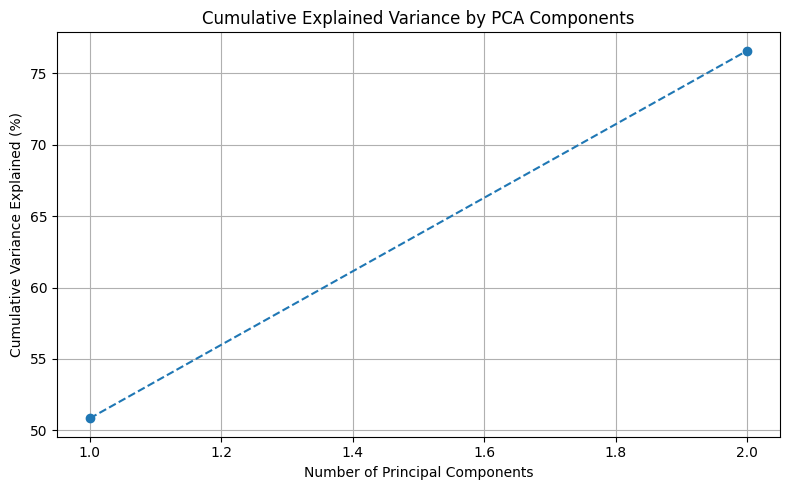

In [14]:
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), cumulative_var * 100, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#DiD model

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [16]:
df_encoded= pd.read_csv('encoded_abortion_data.csv')
df_encoded.head()

,Patient_ID,Gestation_at_Abortion_Weeks,Age_of_Mother,Year,Relationship_Status_Cohabitating,Relationship_Status_Divorced,Relationship_Status_Married,Relationship_Status_Single,Relationship_Status_Widowed,Race_Asian,...,Medical_Complications_to_Child_Birth asphyxia,Medical_Complications_to_Child_Cleft lip or palate,Medical_Complications_to_Child_Congenital heart defects,Medical_Complications_to_Child_Down syndrome,Medical_Complications_to_Child_Intrauterine growth restriction (IUGR),Medical_Complications_to_Child_Jaundice,Medical_Complications_to_Child_No,Medical_Complications_to_Child_Other,Medical_Complications_to_Child_Premature birth,Medical_Complications_to_Child_Still Born
0,1,11.5,22,2021,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
1,2,9.6,23,2024,False,False,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
2,3,8.4,14,2015,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,4,9.6,18,2021,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,5,8.7,45,2018,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [17]:
complication_cols = [
    'Medical_Complications_to_Mother_Anesthesia Reaction',
    'Medical_Complications_to_Mother_Hemorrhage',
    'Medical_Complications_to_Mother_Infection',
    'Medical_Complications_to_Mother_Uterine Perforation'
]

df_encoded['Treatment'] = df_encoded['Legal_Status_of_Abortion_Banned']  
df_encoded['Post'] = (df_encoded['Year'] >= 2022).astype(int)             
df_encoded['DiD'] = df_encoded['Treatment'] * df_encoded['Post']     
#outcome var
df_encoded['Complication'] = (df_encoded[complication_cols].sum(axis=1) > 0).astype(int)


features = ['Treatment', 'Post', 'DiD', 'Age_of_Mother', 'Gestation_at_Abortion_Weeks', 'Race_Asian', 'Race_Hispanic', 'Race_Multiracial', 'Race_Native American', 'Race_Non-Hispanic Black', 'Race_Non-Hispanic White', 'Race_Pacific Islander', 
            'Economic_Status_High Income', 'Economic_Status_Low Income', 'Economic_Status_Middle Income', 'Economic_Status_On government assistance', 
            'Economic_Status_Underemployed', 'Economic_Status_Unemployed', 'Insurance_Military Insurance', 'Insurance_Other', 'Insurance_Private Insurance', 'Insurance_Public/Federal Insurance', 
            'Insurance_Short-term Insurance', 'Insurance_Uninsured', 'Travel_Out_of_State_True']

In [18]:
X = df_encoded[features]
y = df_encoded['Complication']
#scaling for stability
scaler = StandardScaler()
scaled = scaler.fit_transform(df_encoded[['Age_of_Mother', 'Gestation_at_Abortion_Weeks']])
# Create X by selecting all the features
X = df_encoded[features].copy()
# Add the scaled columns to X
X[['Age_of_Mother', 'Gestation_at_Abortion_Weeks']] = scaled

clf = LogisticRegression(class_weight='balanced', max_iter=5000)
clf.fit(X, y)

LogisticRegression(class_weight='balanced', max_iter=5000)

In [19]:
y_prob = clf.predict_proba(X)[:, 1]
y_pred_thresh = (y_prob >= 0.3).astype(int)
print(classification_report(y, y_pred_thresh))
#y_pred = clf.predict(X)
#print(classification_report(y, y_pred))

# Coefficients
for feat, coef in zip(X.columns, clf.coef_[0]):
    print(f"{feat}: Coef = {coef:.4f}, Odds Ratio = {np.exp(coef):.4f}")

              precision    recall  f1-score   support

           0       0.98      0.02      0.05     18240
           1       0.09      0.99      0.16      1760

    accuracy                           0.11     20000
   macro avg       0.53      0.51      0.11     20000
weighted avg       0.90      0.11      0.06     20000

Treatment: Coef = 0.0568, Odds Ratio = 1.0585
Post: Coef = -0.0419, Odds Ratio = 0.9590
DiD: Coef = 0.1172, Odds Ratio = 1.1243
Age_of_Mother: Coef = -0.0470, Odds Ratio = 0.9541
Gestation_at_Abortion_Weeks: Coef = 0.3976, Odds Ratio = 1.4882
Race_Asian: Coef = 0.0966, Odds Ratio = 1.1014
Race_Hispanic: Coef = -0.0725, Odds Ratio = 0.9301
Race_Multiracial: Coef = -0.0488, Odds Ratio = 0.9523
Race_Native American: Coef = 0.0003, Odds Ratio = 1.0003
Race_Non-Hispanic Black: Coef = 0.0410, Odds Ratio = 1.0418
Race_Non-Hispanic White: Coef = -0.0155, Odds Ratio = 0.9846
Race_Pacific Islander: Coef = -0.0300, Odds Ratio = 0.9705
Economic_Status_High Income: Coef = 0.035

In [ ]:
coefficients = clf.coef_[0]
features = X.columns
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients,
    'Odds Ratio': np.exp(coefficients)
})

# Plot Coefficients with Confidence Intervals
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='lightpink')
plt.xlabel('Coefficient Value')
plt.title('Model Coefficients for Logistic Regression')
plt.show()

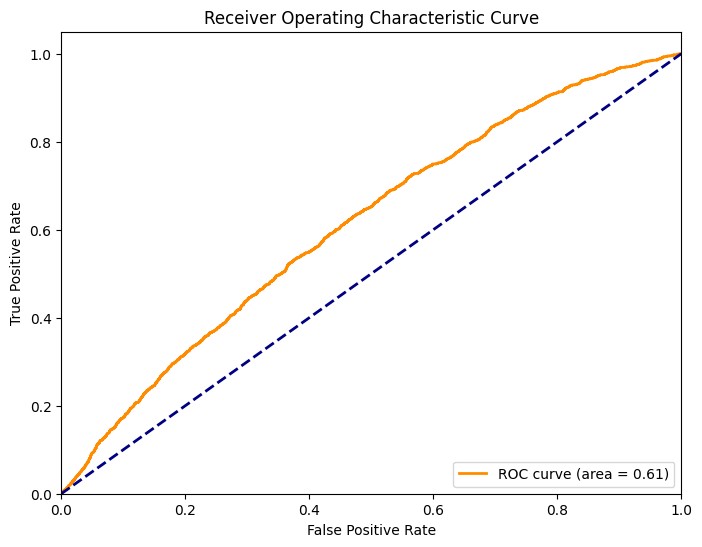

In [21]:
fpr, tpr, thresholds = roc_curve(y, clf.predict_proba(X)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
state_columns = [col for col in df_encoded.columns if col.startswith('State_')]

df_encoded['State'] = df_encoded[state_columns].idxmax(axis=1).str.replace('State_', '')
state_complications = df_encoded.groupby(['State', 'Post'])['Complication'].mean().reset_index()
state_order = sorted(df_encoded['State'].unique())

# Plotting
plt.figure(figsize=(20, 8))
palette = {0: 'steelblue', 1: 'darkorange'}
sns.lineplot(x='State', y='Complication', hue='Post', data=state_complications, marker='o')
for x in range(len(state_order)):
    plt.axvline(x=x, color='black', linestyle='--', linewidth=0.7, alpha=0.5)

plt.title('Complication Rate Trend by State: Pre and Post 2022', fontsize=18)
plt.xlabel('State', fontsize=16)
plt.ylabel('Average Complication Rate', fontsize=16)
plt.xticks(ticks=range(len(state_order)), labels=state_order, rotation=90, fontsize=14)
plt.yticks(fontsize=12)
#plt.legend(title='Post-2022 Status', labels=['Pre-2022', 'Post-2022'], title_fontsize=13, fontsize=12)

legend_handles = [
    Patch(color='steelblue', label='Pre 2022'),
    Patch(color='darkorange', label='Post 2022')
]
plt.legend(handles=legend_handles, title='Period')

plt.tight_layout()
plt.show()

In [ ]:
#GLM model

In [ ]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load encoded dataset
df_encoded = pd.read_csv('encoded_abortion_data.csv')

In [ ]:
# Define relevant predictors (excluding 'Banned')
predictors = [
    'State_Regulations_High',
    'State_Regulations_Moderate',
    'State_Regulations_Low'
]

# Add constant for intercept
X = sm.add_constant(df_encoded[predictors])

# Define all mother complication columns
mother_cols = [
    'Medical_Complications_to_Mother_Anesthesia Reaction',
    'Medical_Complications_to_Mother_Hemorrhage',
    'Medical_Complications_to_Mother_Infection',
    'Medical_Complications_to_Mother_Uterine Perforation'
]

# Define all child complication columns
child_cols = [
    'Medical_Complications_to_Child_Birth asphyxia',
    'Medical_Complications_to_Child_Cleft lip or palate',
    'Medical_Complications_to_Child_Congenital heart defects',
    'Medical_Complications_to_Child_Down syndrome',
    'Medical_Complications_to_Child_Intrauterine growth restriction (IUGR)',
    'Medical_Complications_to_Child_Jaundice',
    'Medical_Complications_to_Child_Other',
    'Medical_Complications_to_Child_Premature birth',
    'Medical_Complications_to_Child_Still Born'
]

# Combine complication columns into binary outcome: 1 if any complication, else 0
y_mother = df_encoded[mother_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)
y_child = df_encoded[child_cols].sum(axis=1).apply(lambda x: 1 if x > 0 else 0)

# Fix data types
X = X.astype(float)
y_mother = y_mother.astype(float)
y_child = y_child.astype(float)

In [ ]:
# Fit GLM models
model_mother = sm.GLM(y_mother, X, family=sm.families.Binomial()).fit()
print("=== GLM Results: Complications to Mother ===")
print(model_mother.summary())

model_child = sm.GLM(y_child, X, family=sm.families.Binomial()).fit()
print("\n=== GLM Results: Complications to Child ===")
print(model_child.summary())

# Prepare coefficients for visualization
coef_df = pd.DataFrame({
    'Predictor': predictors,
    'Mother Complications': model_mother.params[predictors],
    'Child Complications': model_child.params[predictors]
})

# Rename predictors for better axis labels
label_mapping = {
    'State_Regulations_High': 'State Reg-High',
    'State_Regulations_Moderate': 'State Reg-Moderate',
    'State_Regulations_Low': 'State Reg-Low'
}
coef_df['Predictor Label'] = coef_df['Predictor'].map(label_mapping)

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
bar_plot = coef_df.set_index('Predictor Label')[['Mother Complications', 'Child Complications']].plot(
    kind='bar',
    color=['#FFB347', '#C71585'],  # pastel orange and dark pink
    figsize=(10, 6)
)
plt.title('GLM Coefficients: State Regulations vs. Medical Complications')
plt.ylabel('Coefficient Value')
plt.xlabel('Predictor')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Move legend outside
plt.legend(["Mother Complications", "Child Complications"], title="Outcome", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Predict probabilities
y_mother_pred = model_mother.predict(X)
y_child_pred = model_child.predict(X)

# Plot predicted probabilities vs actual for mother complications
plt.figure(figsize=(10, 5))

# Mother subplot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_mother_pred, y=y_mother, alpha=0.4)
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--')
plt.title("GLM: Predicted vs Actual (Mother)")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Outcome")
plt.grid(True)

# Child subplot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_child_pred, y=y_child, alpha=0.4)
sns.lineplot(x=[0, 1], y=[0, 1], color='red', linestyle='--')
plt.title("GLM: Predicted vs Actual (Child)")
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Outcome")
plt.grid(True)

plt.tight_layout()
plt.show()